<a href="https://colab.research.google.com/github/anurag4667/Deep_learning/blob/main/stock_market_prediction_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf

In [3]:
df = yf.download("AAPL", start="2017-01-01", end="2022-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.827246,26.868821,26.506197,26.746406,115127600
2017-01-04,26.797213,26.910389,26.734851,26.757948,84472400
2017-01-05,26.933487,26.991230,26.748710,26.774117,88774400
2017-01-06,27.233757,27.291500,26.901159,26.972759,127007600
2017-01-09,27.483196,27.584824,27.240678,27.242987,134247600


In [5]:
df2 = df.reset_index()['Close']
df2

Ticker,AAPL
0,26.827246
1,26.797213
2,26.933487
3,27.233757
4,27.483196
...,...
1254,176.996674
1255,175.975891
1256,176.064270
1257,174.906082


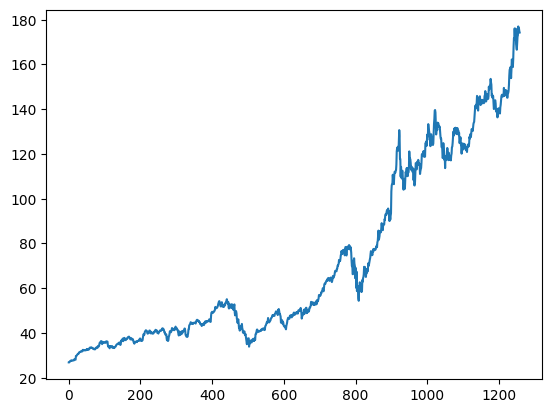

In [6]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [ ]:
# lstm are sensitive to scale of the data

In [7]:
import numpy as np


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [9]:
df2

array([[1.99954856e-04],
       [0.00000000e+00],
       [9.07289127e-04],
       ...,
       [9.93792231e-01],
       [9.86081232e-01],
       [9.81964595e-01]])

In [10]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size,:], df2[training_size:len(df2),:1]

In [11]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [13]:
X_train.shape

(717, 100)

In [16]:
# [samples, timestop , fetures] is required for lstm
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - loss: 0.0121 - val_loss: 0.0977
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - loss: 0.0017 - val_loss: 0.0053
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 7.4404e-04 - val_loss: 0.0070
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - loss: 5.1309e-04 - val_loss: 0.0030
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - loss: 4.2270e-04 - val_loss: 0.0016
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 3.6324e-04 - val_loss: 0.0016
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 3.1898e-04 - val_loss: 0.0017
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 2.6757e-04 - val_loss: 0.0028
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - loss: 2.7036e-04 - val_loss: 0.0022
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 2.4939e-04 - val_loss: 0.0033
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 2.1713e-04 - val_loss: 0.0022
Epoch

In [21]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [23]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

48.89307618998819

In [24]:
math.sqrt(mean_squared_error(y_test, test_predict))

120.27466140313065

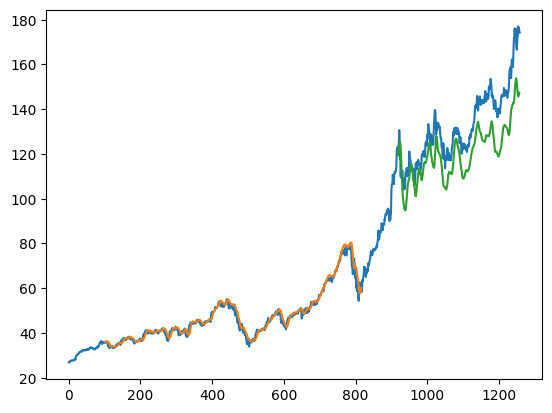

In [25]:
look_back = 100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()